## Univariate Analysis

In [1]:
import pandas as pd
import seaborn as sns
sns.set_style()
sns.set(rc={'figure.figsize':(16,12)})

In [2]:
titanic_df = sns.load_dataset('titanic')
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Nominal Data

In [3]:
nominal_titanic_df = titanic_df[['sex', 'deck' , 'embark_town' ,'alone', 'who']]
nominal_titanic_df.head()

,sex,deck,embark_town,alone,who
0,male,NaN,Southampton,False,man
1,female,C,Cherbourg,False,woman
2,female,NaN,Southampton,True,woman
3,female,C,Southampton,False,woman
4,male,NaN,Southampton,True,man


In [4]:
nominal_titanic_df.describe()

,sex,deck,embark_town,alone,who
count,891,203,889,891,891
unique,2,7,3,2,3
top,male,C,Southampton,True,man
freq,577,59,644,537,537


In [5]:
for name, col in nominal_titanic_df.iteritems():
    print(name)
    print(col.value_counts())
    print()

sex
male      577
female    314
Name: sex, dtype: int64

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

alone
True     537
False    354
Name: alone, dtype: int64

who
man      537
woman    271
child     83
Name: who, dtype: int64



<AxesSubplot:ylabel='who'>

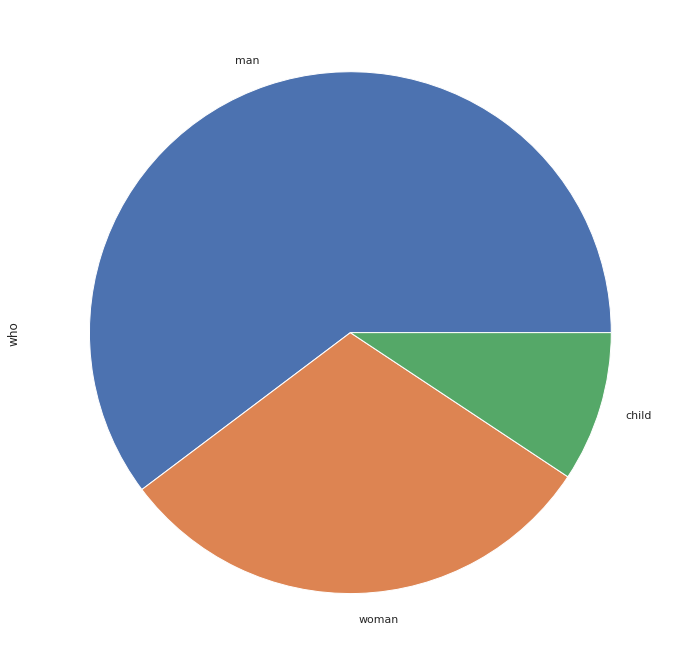

In [6]:
nominal_titanic_df.who.value_counts().plot.pie()

<AxesSubplot:>

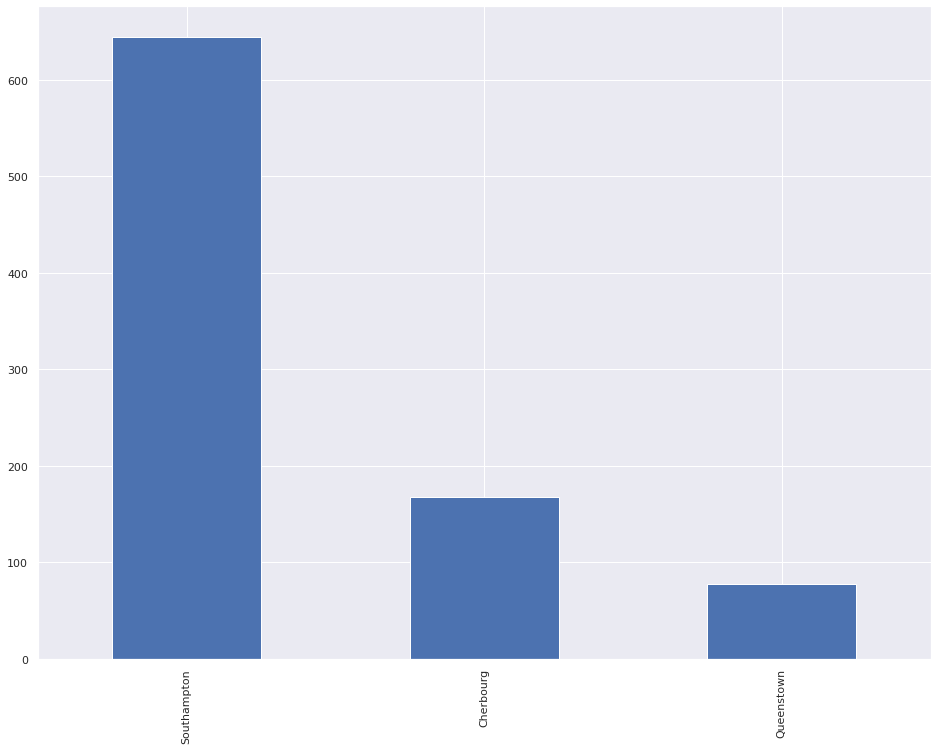

In [7]:
nominal_titanic_df.embark_town.value_counts().plot.bar()

### Ordinal data

In [8]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [9]:
ordinal_titanic_df = titanic_df[['class', 'alive', 'embark_town' , 'sex', 'who', 'deck', 'alone']]
ordinal_titanic_df

,class,alive,embark_town,sex,who,deck,alone
0,Third,no,Southampton,male,man,NaN,False
1,First,yes,Cherbourg,female,woman,C,False
2,Third,yes,Southampton,female,woman,NaN,True
3,First,yes,Southampton,female,woman,C,False
4,Third,no,Southampton,male,man,NaN,True
...,...,...,...,...,...,...,...
886,Second,no,Southampton,male,man,NaN,True
887,First,yes,Southampton,female,woman,B,True
888,Third,no,Southampton,female,woman,NaN,False
889,First,yes,Cherbourg,male,man,C,True


In [10]:
ordinal_titanic_df.describe()

,class,alive,embark_town,sex,who,deck,alone
count,891,891,889,891,891,203,891
unique,3,2,3,2,3,7,2
top,Third,no,Southampton,male,man,C,True
freq,491,549,644,577,537,59,537


In [11]:
ordinal_titanic_df['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

<AxesSubplot:>

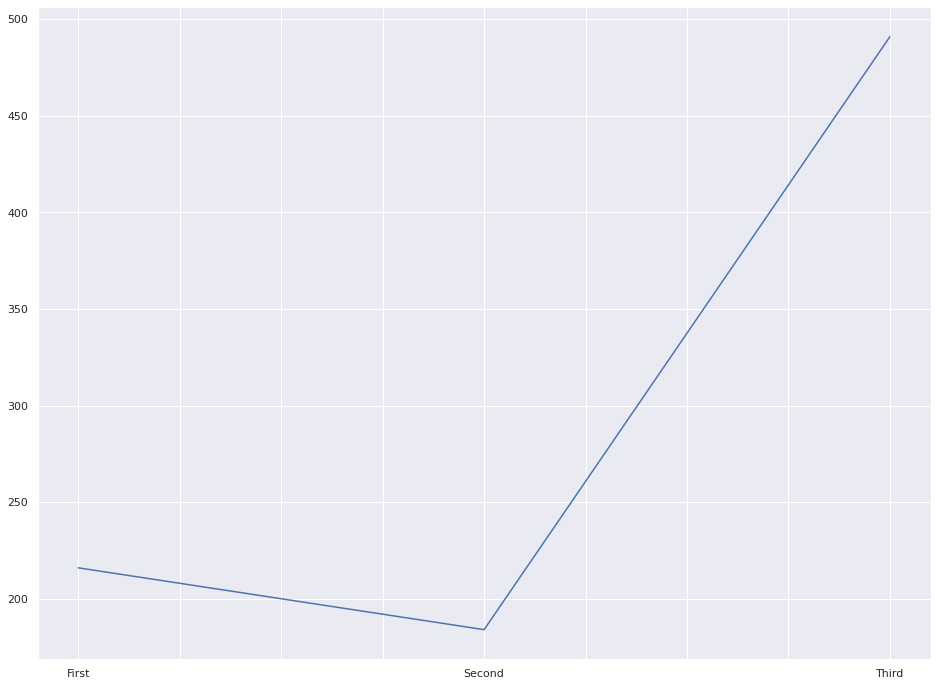

In [12]:
ordinal_titanic_df['class'].value_counts()[['First', 'Second', 'Third']].plot()

<AxesSubplot:>

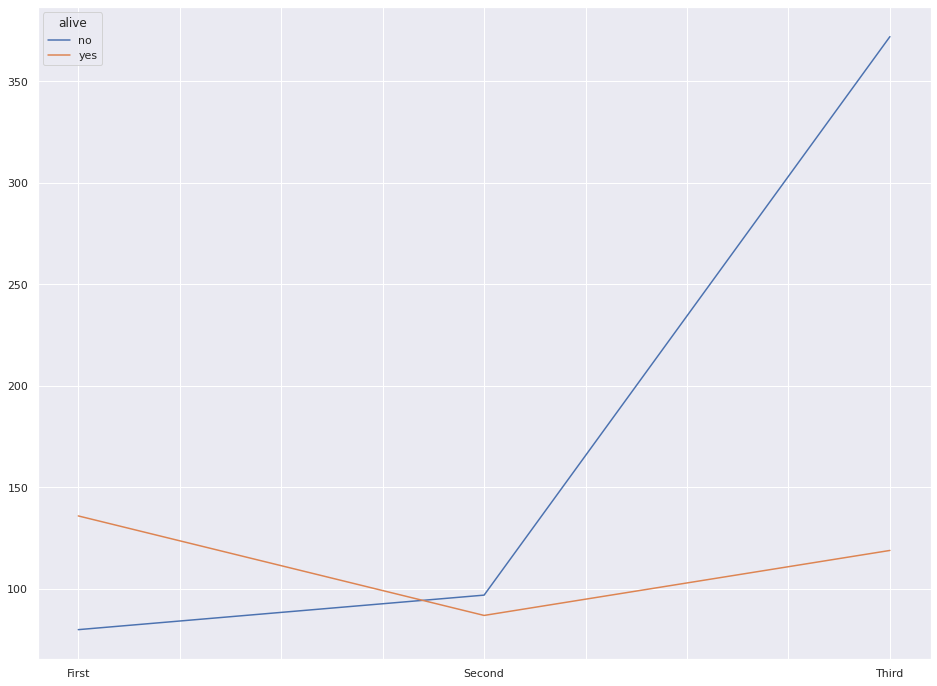

In [13]:
ordinal_titanic_df['class'].groupby(ordinal_titanic_df.alive).apply(lambda x: x.value_counts()).unstack(0).reindex(['First', 'Second', 'Third']).plot()

### Numerical data

In [14]:
numerical_titanic_df = titanic_df[['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']]
numerical_titanic_df.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [15]:
numerical_titanic_df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:ylabel='Frequency'>

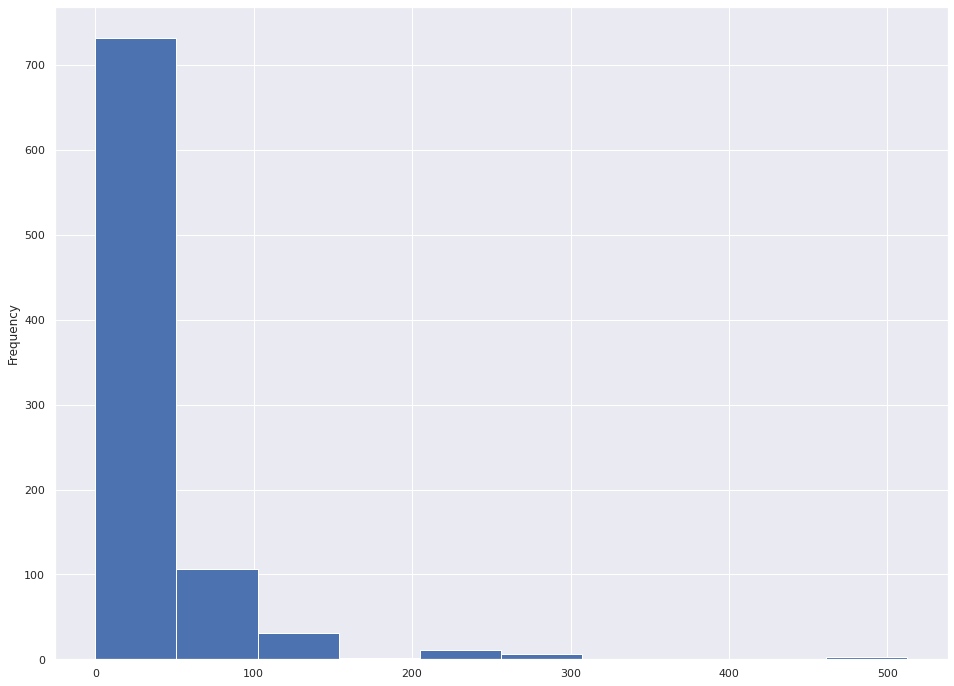

In [16]:
numerical_titanic_df.fare.plot.hist()

In [17]:
print('median')
print(numerical_titanic_df.fare.median())
print('mean')
print(numerical_titanic_df.fare.mean())

median
14.4542
mean
32.204207968574636


<AxesSubplot:ylabel='Frequency'>

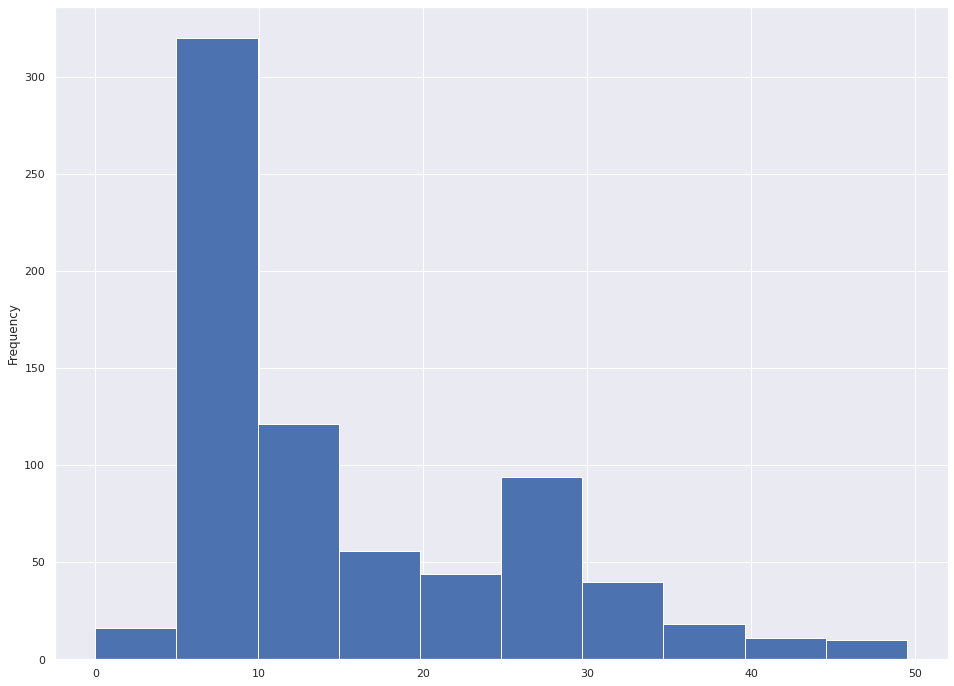

In [18]:
numerical_titanic_outliers_df = numerical_titanic_df.fare[numerical_titanic_df.fare<50]
numerical_titanic_outliers_df.plot.hist()

In [19]:
print('median')
print(numerical_titanic_outliers_df.median())
print('mean')
print(numerical_titanic_outliers_df.mean())

median
11.1333
mean
15.500598493150687
